In [1]:
%matplotlib notebook
import numpy as np
np.set_printoptions(linewidth=np.inf)
import glob
import os
import sys
import matplotlib.pyplot as plt
plt.rcParams.update({'errorbar.capsize': 2})
from scipy import optimize

In [2]:
path = '../data/'
n = 1
na_511 = np.array([])
na_127 = np.array([])
h = 4.4
hs = np.array([h])
while n < 10:
    for infile in glob.glob(os.path.join(path, 'round0_Na*h%d.tsv' %(n))):
        channel, N = np.loadtxt(infile, unpack=True, skiprows=23)
        dN = np.sqrt(N)
        for i, value in enumerate(dN):
            if value == 0:
                dN[i] = 1.14
        N_511 = N[266:366]
        N_127 = N[725:825]
        s_511 = np.sum(N_511)
        s_127 = np.sum(N_127)
        na_511 = np.append(na_511, s_511)
        na_127 = np.append(na_127, s_127)
        h = h + 3.3
        if n!=9: hs = np.append(hs,h)
        n+=1

In [3]:
n = 1
cs_662 = np.array([])
while n < 10:
    for infile in glob.glob(os.path.join(path, 'round0_Cs*h%d.tsv' %(n))):
        channel, N = np.loadtxt(infile, unpack=True, skiprows=24)
        dN = np.sqrt(N)
        for i, value in enumerate(dN):
            if value == 0:
                dN[i] = 1.14
        N_662 = N[705:850]
        s_662 = np.sum(N_662)
        cs_662 = np.append(cs_662, s_662)
        n+=1

<IPython.core.display.Javascript object>


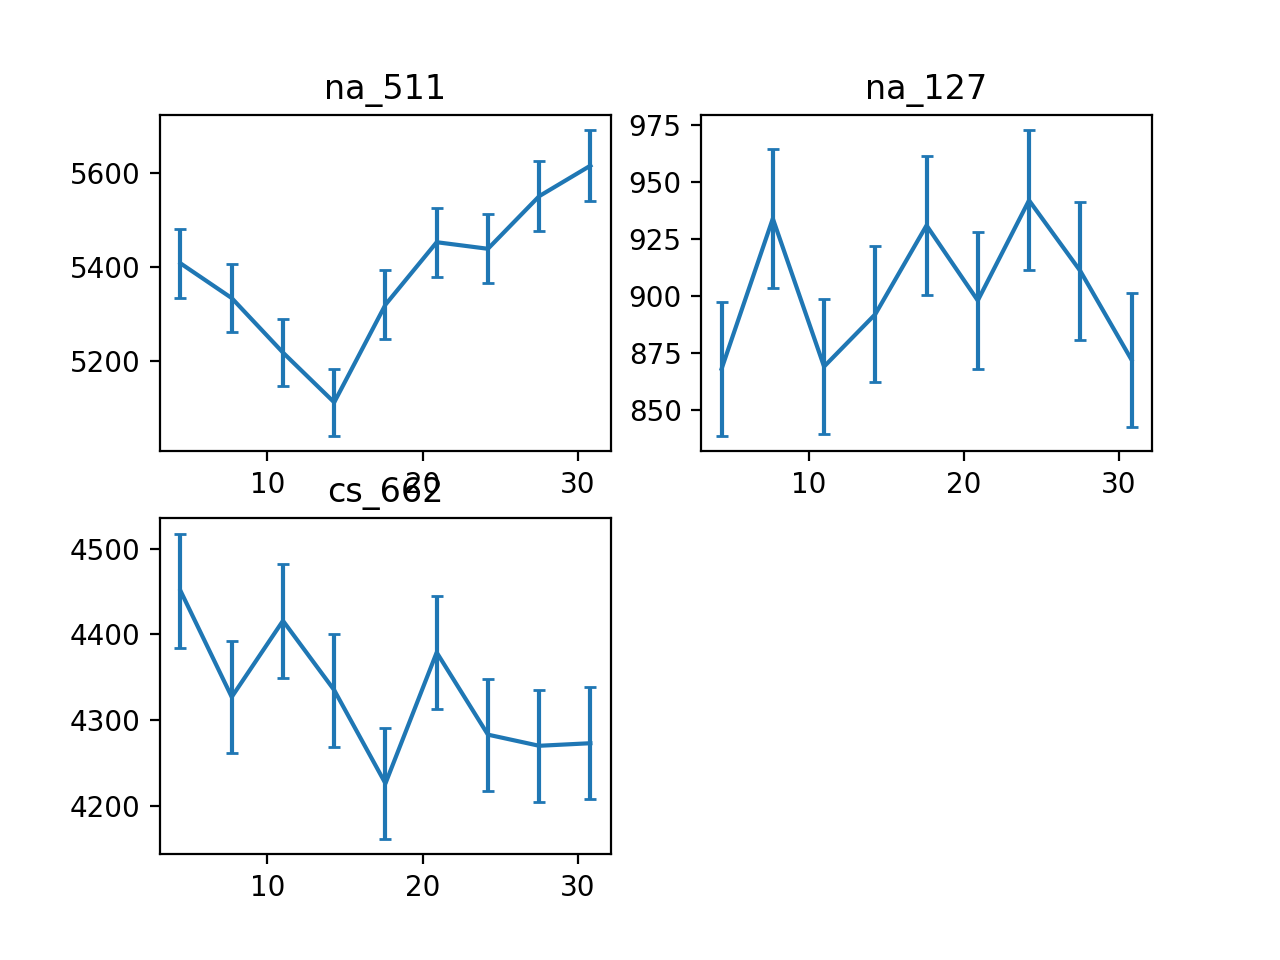

Text(0.5, 1.0, 'cs_662')

In [4]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.errorbar(hs,na_511,np.sqrt(na_511))
ax.set_title("na_511")
ax1 = fig.add_subplot(222)
ax1.errorbar(hs,na_127,np.sqrt(na_127))
ax1.set_title("na_127")
ax2 = fig.add_subplot(223)
ax2.errorbar(hs,cs_662,np.sqrt(cs_662))
ax2.set_title("cs_662")